# Sharks Analysis - Project Pandas
 

### Importación de módulos

In [17]:
import re
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv("Input/attacks.csv",encoding='cp1252')
data = pd.DataFrame(data)

### Análisis inicial dataset

In [156]:
#Primero analizamos qué información tenemos en el dataset

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04,2018.06.04,6299.0,NaN,NaN


In [ ]:
data[2:13]

In [21]:
data.count()

Case Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6309
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [23]:
#Analizamos cuántos de estos valores son nulos

null_cols = data.isnull().sum()
null_cols

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [ ]:
data.isnull().sum().sort_values(ascending=False).head(20)

In [28]:
data.shape

(25723, 24)

In [31]:
#Como vemos la cantidad de valores nulos en el dataset es muy elevado y está presenta en todas las columnas por lo que será necesario limpiar las columnas

In [33]:
low_variance = []
 
for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
 
print(low_variance)

[]


In [35]:
stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

#solo nos coge dos columnas como número

,count,mean,std,min,25%,50%,75%,max,IQR
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0,63.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0,3154.0


In [36]:
#Analizamos el datatype

data.dtypes


Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [39]:
#data['date'] = data['date'].astype('datetime')


In [43]:
#We can take a look at the unique values: print(set(data['pdf']))

In [44]:
data["href"]

0        http://sharkattackfile.net/spreadsheets/pdf_di...
1        http://sharkattackfile.net/spreadsheets/pdf_di...
2        http://sharkattackfile.net/spreadsheets/pdf_di...
3        http://sharkattackfile.net/spreadsheets/pdf_di...
4        http://sharkattackfile.net/spreadsheets/pdf_di...
                               ...                        
25718                                                  NaN
25719                                                  NaN
25720                                                  NaN
25721                                                  NaN
25722                                                  NaN
Name: href, Length: 25723, dtype: object

In [51]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
data.groupby('Activity').agg({'Activity':"count"}).sort_values

In [99]:
print(set(data['Fatal (Y/N)']))
data.groupby('Fatal (Y/N)').agg({'Fatal (Y/N)':"count"}).sort_values

{nan, 'Y', ' N', 'y', 'N', 'M', '2017', 'N ', 'UNKNOWN'}


<bound method DataFrame.sort_values of              Fatal (Y/N)
Fatal (Y/N)             
 N                     7
2017                   1
M                      1
N                   4293
N                      1
UNKNOWN               71
Y                   1388
y                      1>

In [98]:
data.groupby('Species ').agg({'Species ':"count"}).sort_values

{nan, 'Doubtful / Unconfirmed attack / Unable to verify in local records', '1 m  shark', "2' to 3' reef shark", "3 m [10'], 200-kg [441-lb] bull shark", '200 to 300 kg shark', 'Grey nurse shark, 2 m', "3 m [10'] white shark", '3.6 m  white shark  (or bronze whaler)', 'reef shark, 1m', 'Bull shark, 1.5', '1.5 m grey reef shark', "5 m [16.5'] white shark", 'Oceanic whitetip shar,; identified by Dr. W.C. Schoeder on photograph & Dr. L.P. L. Schultz on sketch by observer', "5' blue shark", 'Bronze whaler shark, 2 m', "1.8 m [6'], 180-lb shark", ">2.4 m [8'] white shark", 'White shark, 2m to 3 m', '3m shark, probably a smooth hound', "White shark, 4 m [13'] rk", "0.9 m to 1.5 m [3' to 5'] shark", "White shark, 3 m [10'], species identity confirmed by witnesses & tooth pattern in leg & board ", "Oceanic whitetip shark, 6'", 'Lemon shark or sandtiger shark', "Teeth in hull identified as those from a white shark 4.6 m [15'] in length", 'White shark, 6 m', "2.1 m to 2.4 m [7' to 8'] shark", 'Nu

<bound method DataFrame.sort_values of                                                     Species 
Species                                                     
                                                           6
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 ...         1
 1.5 m [5'] dusky shark                                    1
 6' to 8' shark                                            1
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 ...         1
...                                                      ...
unknown, possibly a white shark                            1
whaler shark                                               1
white shark                                                1
                                                           2
“small brown shark”                                        1

[1549 rows x 1 columns]>

In [86]:
data.groupby("Age").agg({"Age":"count"}).sort_values

<bound method DataFrame.sort_values of          Age
Age         
           2
           1
 28        1
 30        1
 43        1
...      ...
mid-20s    1
mid-30s    1
teen       5
young      2
           1

[157 rows x 1 columns]>

In [84]:
data.groupby("Type").agg({"Type":"count"}).sort_values

<bound method DataFrame.sort_values of               Type
Type              
Boat           137
Boating        203
Boatomg          1
Invalid        547
Provoked       574
Questionable     2
Sea Disaster   239
Unprovoked    4595>

In [79]:
data.groupby("Sex ").agg({"Sex ":"count"}).sort_values

<bound method DataFrame.sort_values of       Sex 
Sex       
.        1
F      637
M     5094
M        2
N        2
lli      1>

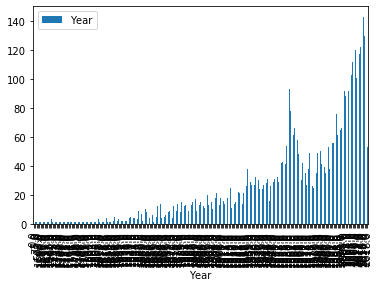

In [82]:
%matplotlib inline

data.groupby("Year").agg({"Year":"count"}).plot.bar()

In [83]:
data.groupby("Year").agg({"Year":"count"}).sort_values

<bound method DataFrame.sort_values of         Year
Year        
0.0      125
5.0        1
77.0       1
500.0      1
1543.0     1
...      ...
2014.0   127
2015.0   143
2016.0   130
2017.0   136
2018.0    53

[249 rows x 1 columns]>

In [108]:
data.groupby("Country").agg({"Country":"count"}).sort_values


<bound method DataFrame.sort_values of                    Country
Country                   
 PHILIPPINES             1
 TONGA                   3
ADMIRALTY ISLANDS        1
AFRICA                   1
ALGERIA                  1
...                    ...
VIETNAM                 15
WEST INDIES              2
WESTERN SAMOA            1
YEMEN                    2
YEMEN                    7

[212 rows x 1 columns]>

In [122]:
countries = data.Country.value_counts()
countries

USA                         2229
AUSTRALIA                   1338
SOUTH AFRICA                 579
PAPUA NEW GUINEA             134
NEW ZEALAND                  128
                            ... 
NORTHERN MARIANA ISLANDS       1
CYPRUS                         1
ST. MARTIN                     1
NEVIS                          1
GULF OF ADEN                   1
Name: Country, Length: 212, dtype: int64

In [77]:
data.groupby("Country").count()[["Case Number"]]

,Case Number
Country,
PHILIPPINES,1
TONGA,3
ADMIRALTY ISLANDS,1
AFRICA,1
ALGERIA,1
...,...
VIETNAM,15
WEST INDIES,2
WESTERN SAMOA,1


### Posibles hipótesis

* Hay más muertes por tiburones blancos en Australia que en Estados Unidos
* White Sharks are more aggresive during our summer months
* Los tiburones prefieres comer durante las primeras horas del día (8-14h) 

In [157]:
#renombramos las columnas

colnames = ['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location','Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 
            'Time', 'Species', 'Investigator or Source', 'pdf', 'href formula', 'href','Case Number.1', 'Case Number.2', 'original order', 
            'Unnamed: 22','Unnamed: 23']
pd.DataFrame(data, columns=colnames).head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,NaN,NaN,NaN,NaN,NaN,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,NaN,NaN,NaN,NaN,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,NaN,NaN,NaN,NaN,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,NaN,NaN,NaN,NaN,NaN,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,NaN,NaN,NaN,NaN,NaN,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [159]:
# We will add these column names to a list, and then we will pass those columns to the drop method and indicate that we want columns (not rows) dropped by setting the axis parameter to 1.

drop_cols = ['Investigator or Source ','pdf', 'href formula', 'href']
data = data.drop(drop_cols, axis =1)
data

KeyError: "['Investigator or Source ' 'pdf' 'href formula' 'href'] not found in axis"

In [149]:
#we investigate about the information "unnamed 22" and "unnamed 23"

print(set(data['Unnamed: 23']))

{nan, 'change filename', 'Teramo'}


In [139]:
data['Species '].str.contains("White")

0         True
1          NaN
2          NaN
3        False
4        False
         ...  
25718      NaN
25719      NaN
25720      NaN
25721      NaN
25722      NaN
Name: Species , Length: 25723, dtype: object

In [144]:
data["Species "].count()

3464

In [150]:
#we check the date format

In [160]:
print(set(data['Date']))

{nan, '05-Jan-1957', '27-Jun-2016', '03-Jul-1926', '18-Sep-2009', '22-Apr-1936', '09-May-1942', '06-Jul-2012', '11-Dec-2004', '03-Apr-2008', '21-May-2006', '10-Aug-1981', 'Nov-1960', 'Reported 04-Aug-1936', '25-Sep-2017', '06-Aug-1932', '25-Nov-2008', '24-Feb-2008', 'Jun-2003', '18-Jan-2012', '20-Jun-2002', '22-Jul-2000', 'Reported 19-Mar-1953', '28-Dec-1961', '13-Sep-2007', '1985', '14-Oct-1971', '10-Feb-1955', '26-Nov-2004', '17-Sep-1911', '20-Sep-2004', '28-Feb-1959', '11-Jul-1987', '06-Oct-2004', 'Feb-2007', '12-Dec-1958', '09-Apr-2005', '10-Jun-1976', 'Reported 04-Dec-1914', '19-Dec-1959', 'May-2001', '15-Jun-1925', '1910', '07-Sep-2001', '  19-Jul-1889', '22-Jul-2014', '12-Jul-2014', '16-Oct-2012', '17-Nov-2002', 'Jan-1913', '21-Dec-1929', '23-Dec-1992', '3-Jul-1879', 'Reported 09-May-1951', '31-Aug-2000', '06-Jan-1835', '08-May-1985', '14-Jul-1920', '24-Feb-1960', 'Reported 05-May-1917', '09-Oct-2011', '1-Jul-2005', '26-Jun-1977', '1888', '02-Mar-2016', '02-Dec-1975', '11-Sep-20

In [163]:
data.groupby('Date').agg({'Date':"count"}).sort_values

<bound method DataFrame.sort_values of                                                     Date
Date                                                    
\n1951.12.15.R                                         1
    10-Jan-2009                                        1
    15-Jun-1937                                        1
    16-Jan-1970                                        1
    22-Jul-2013                                        1
   21-Sep-1908                                         1
  02-Jun-1899                                          1
  03-Feb-1914                                          1
  05-Oct-1985                                          1
  10-Jan-1903                                          1
  16-Feb-1910                                          1
  19-Jul-1889                                          1
  21-Jun-1934                                          1
  24-Mar-1990                                          1
  25-Jun-1982                                    

In [166]:
data.groupby('Time').agg({'Time':"count"}).sort_values

<bound method DataFrame.sort_values of                                                     Time
Time                                                    
                                                       2
                                                       1
                                                       1
 14h00                                                 1
"After dark"                                           1
"After lunch"                                          1
"Early evening"                                        1
"Evening"                                              1
"Just before 11h00"                                    1
"Night"                                                1
"shortly before dusk"                                  1
--                                                     5
00h30                                                  1
01h00                                                  3
01h30                                            

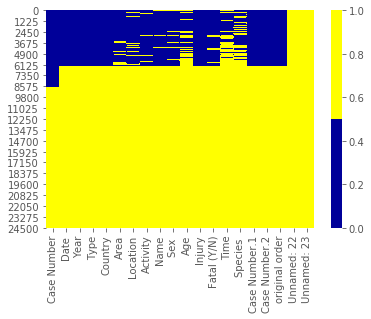

In [169]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

cols = data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [171]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Case Number - 66.0%
Date - 76.0%
Year - 76.0%
Type - 76.0%
Country - 76.0%
Area - 77.0%
Location - 78.0%
Activity - 78.0%
Name - 76.0%
Sex  - 78.0%
Age - 87.0%
Injury - 76.0%
Fatal (Y/N) - 78.0%
Time - 89.0%
Species  - 87.0%
Case Number.1 - 76.0%
Case Number.2 - 76.0%
original order - 75.0%
Unnamed: 22 - 100.0%
Unnamed: 23 - 100.0%


In [ ]:
#Nan Values: https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3